In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
from networkx.generators.random_graphs import erdos_renyi_graph
import copy

In [18]:
# -- Initialize graphs
seed = 30
G = nx.florentine_families_graph()
nodes = G.nodes()
edges = G.edges()
layout = nx.spring_layout(G, seed=seed)



/tmp/ipykernel_25998/2274801888.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [19]:
# extracting adjacency matrix
A = nx.adjacency_matrix(G)

# calculate the Jaccard similarity between every pair of nodes 
S = np.zeros((len(nodes),len(nodes)))

for i in range(len(nodes)):
    for j in range(len(nodes)):
        NinNj = np.array(A.todense()[:,i])*np.array(A.todense()[:,j]) # calculate the intersection of N(vi) and N(vj)
        NiuNj = np.array(A.todense()[:,i])+np.array(A.todense()[:,j]) # calculate the union of N(vi) and N(vj)
        S[i,j] = len(np.nonzero(NinNj)[0])/len(np.nonzero(NiuNj)[0]) # put into S matrix

/tmp/ipykernel_25998/824595412.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [10]:
# finding the index of the name "Ginori"
Ginori_id = list(nodes).index('Ginori')

# creating the edge dictionary for Similarity to node "Ginori"
S_dict = {}
for i in range(len(nodes)):
    S_dict[list(nodes)[i]] = S[Ginori_id, i]    

# pass the label to the graph.
nx.set_node_attributes(G,S_dict , "Jaccard")

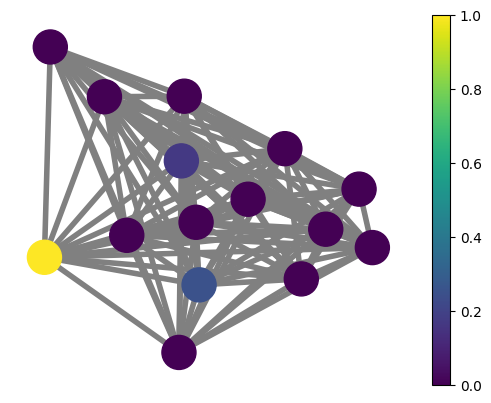

In [13]:
# -- plot Florentine Families graph
nx.draw_networkx_nodes(G, nodelist=nodes, node_color=[ele for ele in S_dict.values()], pos=layout, node_size=600)
ne = nx.draw_networkx_edges(G, edgelist=edges, pos=layout, edge_color='gray', width=4)

# -- plot edges representing similarity
"""
    This example is randomly plotting similarities between 8 pairs of nodes in the graph. 
    Identify the ”Ginori”
"""
# ne = nx.draw_networkx_edges(G, edgelist=new_edges[:8], pos=layout, edge_color=np.asarray(metric[:8]), width=4, alpha=0.7)
plt.colorbar(ne)
plt.axis('off')
plt.show()


In [14]:
S_dict

{'Acciaiuoli': 0.0,
 'Medici': 0.16666666666666666,
 'Castellani': 0.0,
 'Peruzzi': 0.0,
 'Strozzi': 0.0,
 'Barbadori': 0.0,
 'Ridolfi': 0.0,
 'Tornabuoni': 0.0,
 'Albizzi': 0.0,
 'Salviati': 0.0,
 'Pazzi': 0.0,
 'Bischeri': 0.0,
 'Guadagni': 0.25,
 'Ginori': 1.0,
 'Lamberteschi': 0.0}

In [15]:
G2 = nx.create_empty_copy(G, with_data=True)
old_edges = copy.deepcopy(G.edges())
new_edges, metric = [], []

for i in range(len(G2.nodes)):
    G2.add_edge('Ginori', list(nodes)[i])
    # print(f"({u}, {v}) -> {p:.8f}")
    new_edges.append(('Ginori', list(nodes)[i]))
    metric.append(S_dict[list(nodes)[i]])


In [16]:
S_dict

{'Acciaiuoli': 0.0,
 'Medici': 0.16666666666666666,
 'Castellani': 0.0,
 'Peruzzi': 0.0,
 'Strozzi': 0.0,
 'Barbadori': 0.0,
 'Ridolfi': 0.0,
 'Tornabuoni': 0.0,
 'Albizzi': 0.0,
 'Salviati': 0.0,
 'Pazzi': 0.0,
 'Bischeri': 0.0,
 'Guadagni': 0.25,
 'Ginori': 1.0,
 'Lamberteschi': 0.0}

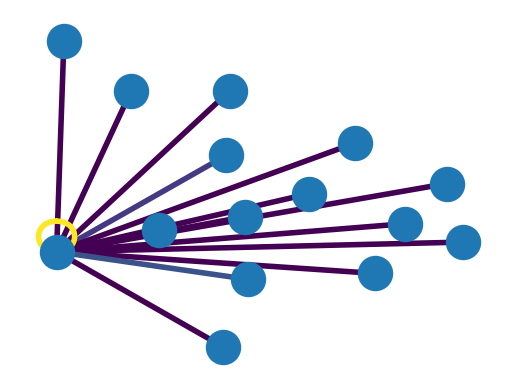

In [20]:

# -- plot Florentine Families graph
nx.draw_networkx_nodes(G2, nodelist=nodes, pos=layout, node_size=600)
ne = nx.draw_networkx_edges(G2, edgelist=new_edges, pos=layout, edge_color =[ele for ele in S_dict.values()], width=4)

# -- plot edges representing similarity
"""
    This example is randomly plotting similarities between 8 pairs of nodes in the graph. 
    Identify the ”Ginori”
"""
# ne = nx.draw_networkx_edges(G, edgelist=new_edges[:8], pos=layout, edge_color=np.asarray(metric[:8]), width=4, alpha=0.7)
# plt.colorbar(ne)
plt.axis('off')
plt.show()
